<a href="https://colab.research.google.com/github/wiwianaa/AnalizaSentymentu/blob/main/Lebiodzik_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -m pip install spacy==2.3.2 -q

!python -m spacy download pl_core_news_lg # końcówka _lg oznacza rozmiar modelu, mamy jeszcze sm czyli small i md czyli medium

     |████████████████████████████████| 9.9 MB 5.2 MB/s 
     |████████████████████████████████| 2.1 MB 60.3 MB/s 
     |████████████████████████████████| 604.2 MB 1.1 MB/s 
  Created wheel for pl-core-news-lg: filename=pl_core_news_lg-2.3.0-py3-none-any.whl size=604232611 sha256=b1a6ad63464ff1a603836b1582854d439323ef8b2b33fc27f03ffc42711de5c7
  Stored in directory: /tmp/pip-ephem-wheel-cache-vn78e1wz/wheels/54/f5/e7/0f8b228e57fe660f87d3ab03d4bbb71eb2f6fe3f5b426d477c
Successfully built pl-core-news-lg
✔ Download and installation successful
You can now load the model via spacy.load('pl_core_news_lg')


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# pomocnicze
import re
import numpy as np
import pandas as pd
import string
# sklearn - modele do ML
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns


In [3]:
data = pd.read_csv("/content/drive/MyDrive/ZUM/tweets_tagged.csv")
data = data[['tweets', 'cleaned_tweet', 'sentiment']]
data

,tweets,cleaned_tweet,sentiment
0,@gazeta_Mocarski @ela_kam___ @copone1dak Jedno...,zastanawiać wpływ ludzki ocieplenie klimat udo...,1
1,💬Posłanka @Ula_Zielińska o #ZielonyOdbudowy: G...,posłanek zielonyodbudowy globalny ocieplenie p...,1
2,💬Globalne ocieplenie powoduje coraz częstsze i...,globalny ocieplenie powodować częsty długo trw...,1
3,❗️Małgorzata Tracz - dodał(a) tweeta.\n🗨️ Treś...,małgorzata tracz dodać tweet treść globalny oc...,1
4,💬 – Globalne ocieplenie powoduje coraz częstsz...,globalny ocieplenie powodować częsty długo trw...,1
...,...,...,...
27297,@wszewko Niby pogoda to nie klimat ale jak prz...,niby pogoda klimat przykurwi plus polsce lewac...,1
27298,@wszewko To jest tragedia gorsza niż w komuniz...,tragedia zły komunizm niezachwiany wiara wznio...,1
27299,Apel w sprawie końca Hiszpanii\n36-letni minis...,apel sprawa koniec hiszpanii letny minister al...,1
27300,@zbigius @AlbertMarten1 Mają dużo wspólnego z ...,mieć wspólny globalny ocieplenie obserwować wz...,1


In [4]:
X=data.cleaned_tweet
y=data.sentiment

0    zastanawiać wpływ ludzki ocieplenie klimat udo...
1    posłanek zielonyodbudowy globalny ocieplenie p...
2    globalny ocieplenie powodować częsty długo trw...
3    małgorzata tracz dodać tweet treść globalny oc...
4    globalny ocieplenie powodować częsty długo trw...
Name: cleaned_tweet, dtype: object


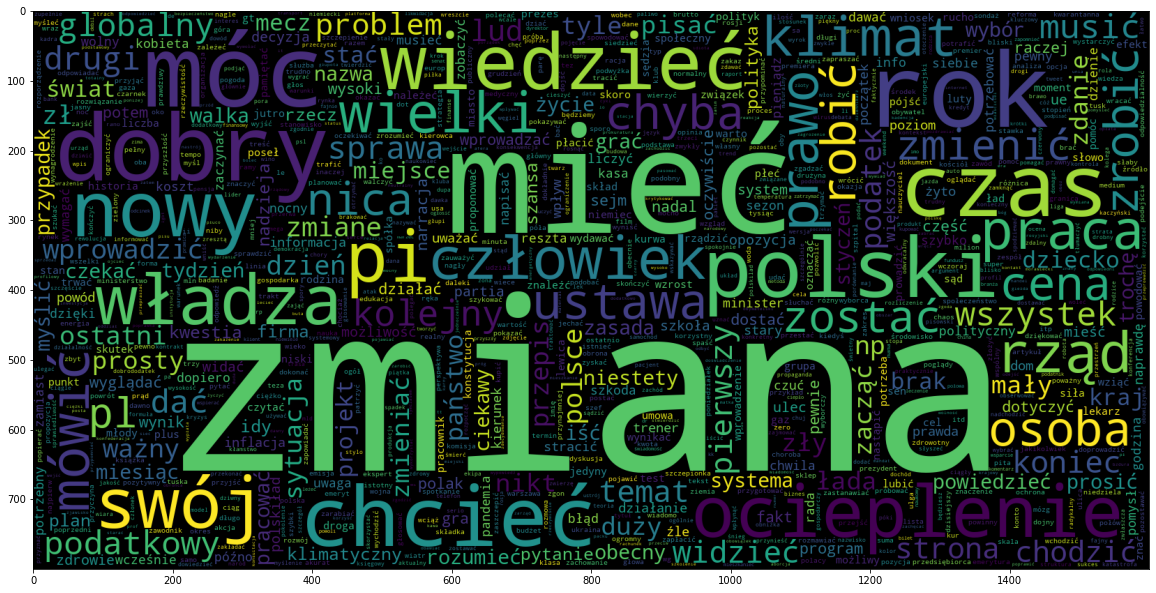

In [5]:
#najcześciej wystepujace slowa dla kat beliver
import matplotlib.pyplot as plt
from wordcloud import WordCloud

data_neg = data['cleaned_tweet'].loc[data['sentiment'] == 1]
#data_neg = ds['text'][:800000]

print(data_neg.head())

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
#wektoryzacja
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
result = vectorizer.fit(X_train)
print('No. of feature_words: ', len(vectorizer.get_feature_names_out()))

No. of feature_words:  255339


In [8]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
tweets = pad_sequences(sequences, maxlen=max_len)
sequences_test = tokenizer.texts_to_sequences(X_test)
tweets_test = pad_sequences(sequences_test, maxlen=max_len)
print(tweets, '\n',tweets_test)

[[   0    0    0 ...   54   73 1996]
 [   0    0    0 ... 1938    1 3328]
 [   0    0    0 ... 1381  261    1]
 ...
 [   0    0    0 ...  257  108 1198]
 [   0    0    0 ...    1  144 4315]
 [   0    0    0 ...  860 1497 4251]] 
 [[   0    0    0 ... 4795 4054 2788]
 [   0    0    0 ... 3400    1  458]
 [   0    0    0 ... 4960  902    1]
 ...
 [   0    0    0 ...  382    1   12]
 [   0    0    0 ...    1  102 1559]
 [   0    0    0 ...    1  128  105]]


In [9]:
import tensorflow as tf

y_train_vec = tf.keras.utils.to_categorical(y_train, 2, dtype="float32")
y_test_vec = tf.keras.utils.to_categorical(y_test, 2, dtype="float32")
print(y_train_vec, y_test_vec)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]] [[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


## Naive Bayes - Bernoulli

In [10]:

BNBmodel = BernoulliNB()
BNBmodel.fit(tweets, y_train)
#model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(tweets_test)

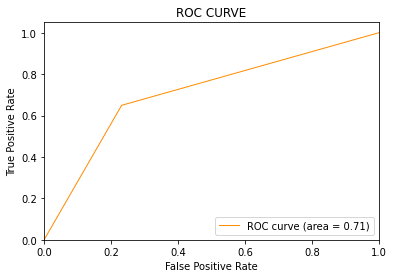

In [11]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.26      0.77      0.39       751
           1       0.95      0.65      0.77      4710

    accuracy                           0.67      5461
   macro avg       0.60      0.71      0.58      5461
weighted avg       0.85      0.67      0.72      5461



Text(0.5, 1.0, 'Confusion Matrix')

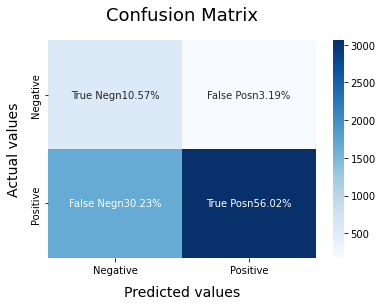

In [12]:
#y_pred = model.predict(X_test)

# Wyświetlenie metryk ewaluacji na podstawie predykcji i ground truth (faktycznych etykiet)
print(classification_report(y_test, y_pred1))

# Obliczamy i wyświetlamy confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred1)
categories = ['Negative','Positive'] #negative - not hamrmfull, positive - harmful
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

##Linear suppot vector

In [13]:
SVCmodel = LinearSVC(max_iter=10000)
SVCmodel.fit(tweets, y_train)
#model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(tweets_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


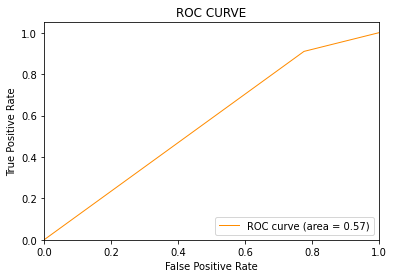

In [14]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.28      0.22      0.25       751
           1       0.88      0.91      0.89      4710

    accuracy                           0.82      5461
   macro avg       0.58      0.57      0.57      5461
weighted avg       0.80      0.82      0.81      5461



Text(0.5, 1.0, 'Confusion Matrix')

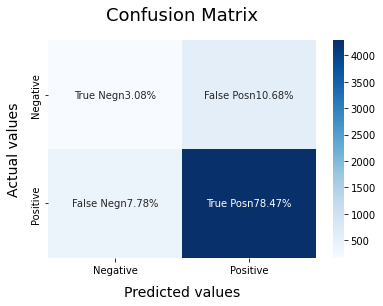

In [15]:
# Wyświetlenie metryk ewaluacji na podstawie predykcji i ground truth (faktycznych etykiet)
print(classification_report(y_test, y_pred2))

# Obliczamy i wyświetlamy confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred2)
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

##Regresja logistyczna

In [16]:
LRmodel = LogisticRegression(max_iter = 1000)
LRmodel.fit(tweets, y_train)
#model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(tweets_test)

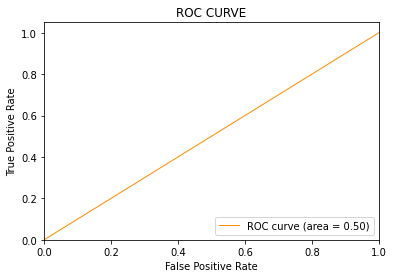

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       751
           1       0.86      1.00      0.93      4710

    accuracy                           0.86      5461
   macro avg       0.43      0.50      0.46      5461
weighted avg       0.74      0.86      0.80      5461



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix')

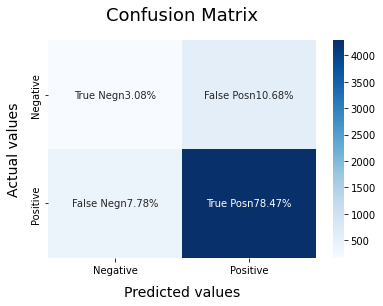

In [18]:
# Wyświetlenie metryk ewaluacji na podstawie predykcji i ground truth (faktycznych etykiet)
print(classification_report(y_test, y_pred3))

# Obliczamy i wyświetlamy confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred2)
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

## Single LSTM layer model

In [19]:
from keras.models import Sequential
from keras import layers
from keras.callbacks import ModelCheckpoint

model1 = Sequential()
model1.add(layers.Embedding(max_words, 20))
model1.add(layers.LSTM(15,dropout=0.5))
model1.add(layers.Dense(2,activation='softmax'))


model1.compile(optimizer='rmsprop',
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

#Checkpoints pozwalają nam zachować model w konkretnym punkcie i później znów go wczytać
checkpoint1 = ModelCheckpoint("best_model_SA.hdf5", 
                              monitor='loss',
                              verbose=1,
                              save_best_only=True,
                              mode='auto',
                              save_freq=1,
                              save_weights_only=False)
history = model1.fit(tweets, 
                     y_train_vec, 
                     epochs=50,
                     validation_data=(tweets_test, y_test_vec),
                     callbacks=[checkpoint1])

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
Epoch 00047: loss did not improve from 0.08114
236/683 [=========>....................] - ETA: 6s - loss: 0.2235 - accuracy: 0.9068
Epoch 00047: loss did not improve from 0.08114

Epoch 00047: loss did not improve from 0.08114

Epoch 00047: loss did not improve from 0.08114

Epoch 00047: loss did not improve from 0.08114
240/683 [=========>....................] - ETA: 6s - loss: 0.2222 - accuracy: 0.9077
Epoch 00047: loss did not improve from 0.08114

Epoch 00047: loss did not improve from 0.08114

Epoch 00047: loss did not improve from 0.08114

Epoch 00047: loss did not improve from 0.08114
244/683 [=========>....................] - ETA: 6s - loss: 0.2223 - accuracy: 0.9079
Epoch 00047: loss did not improve from 0.08114

Epoch 00047: loss did not improve from 0.08114

Epoch 00047: loss did not improve from 0.08114

Epoch 00047: loss did not improve from 0.08114
248/683 [=========>....................] - ETA: 6s - loss: 0

In [20]:
import keras

best_model = keras.models.load_model("best_model_SA.hdf5")

In [21]:
predictions = best_model.predict(tweets_test)

In [22]:
matrix = confusion_matrix(y_test_vec.argmax(axis=1), np.around(predictions, decimals=0).argmax(axis=1))

              precision    recall  f1-score   support

           0       0.57      0.62      0.59       751
           1       0.94      0.92      0.93      4710

    accuracy                           0.88      5461
   macro avg       0.75      0.77      0.76      5461
weighted avg       0.89      0.88      0.89      5461



Text(0.5, 1.0, 'Confusion Matrix')

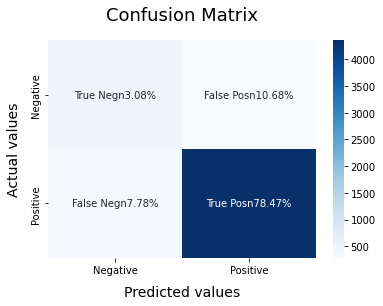

In [23]:
 # Wyświetlenie metryk ewaluacji na podstawie predykcji i ground truth (faktycznych etykiet)
#print(classification_report(y_test_vec, predictions))
y_pred_bool = np.argmax(predictions, axis=1)

print(classification_report(y_test, y_pred_bool))

# Obliczamy i wyświetlamy confusion matrix
#cf_matrix = confusion_matrix(y_test, y_pred2)
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot = labels, cmap = 'Blues',fmt = '',
xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

## Bidirectional

In [24]:
model2 = Sequential()
model2.add(layers.Embedding(max_words, 40, input_length=max_len))
model2.add(layers.Bidirectional(layers.LSTM(20,dropout=0.6)))
model2.add(layers.Dense(2,activation='softmax'))
model2.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint2 = ModelCheckpoint("best_model_SA2.hdf5", 
                              monitor='val_accuracy', 
                              verbose=1,
                              save_best_only=True, 
                              mode='auto', 
                              period=1,
                              save_weights_only=False)
history = model2.fit(tweets, 
                     y_train_vec, 
                     epochs=50,
                     validation_data=(tweets_test, y_test_vec),
                     callbacks=[checkpoint2])

Epoch 1/50
682/683 [============================>.] - ETA: 0s - loss: 0.3451 - accuracy: 0.8639
Epoch 00001: val_accuracy improved from -inf to 0.87090, saving model to best_model_SA2.hdf5
683/683 [==============================] - 25s 32ms/step - loss: 0.3450 - accuracy: 0.8640 - val_loss: 0.3126 - val_accuracy: 0.8709
Epoch 2/50
681/683 [============================>.] - ETA: 0s - loss: 0.3039 - accuracy: 0.8745
Epoch 00002: val_accuracy improved from 0.87090 to 0.87383, saving model to best_model_SA2.hdf5
683/683 [==============================] - 14s 21ms/step - loss: 0.3037 - accuracy: 0.8746 - val_loss: 0.3042 - val_accuracy: 0.8738
Epoch 3/50
683/683 [==============================] - ETA: 0s - loss: 0.2914 - accuracy: 0.8769
Epoch 00003: val_accuracy did not improve from 0.87383
683/683 [==============================] - 13s 18ms/step - loss: 0.2914 - accuracy: 0.8769 - val_loss: 0.2865 - val_accuracy: 0.8720
Epoch 4/50
681/683 [============================>.] - ETA: 0s - loss:

In [25]:
import keras

best_model = keras.models.load_model("best_model_SA2.hdf5")

In [26]:
predictions2 = best_model.predict(tweets_test)

In [27]:
matrix = confusion_matrix(y_test_vec.argmax(axis=1), np.around(predictions2, decimals=0).argmax(axis=1))

              precision    recall  f1-score   support

           0       0.68      0.42      0.52       751
           1       0.91      0.97      0.94      4710

    accuracy                           0.89      5461
   macro avg       0.80      0.69      0.73      5461
weighted avg       0.88      0.89      0.88      5461



Text(0.5, 1.0, 'Confusion Matrix')

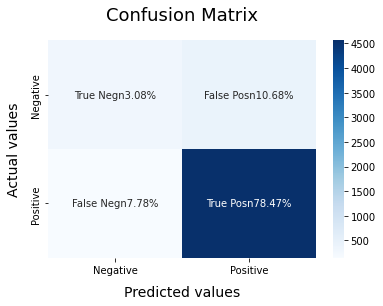

In [28]:
 # Wyświetlenie metryk ewaluacji na podstawie predykcji i ground truth (faktycznych etykiet)
#print(classification_report(y_test_vec, predictions))
y_pred_bool = np.argmax(predictions2, axis=1)

print(classification_report(y_test, y_pred_bool))

# Obliczamy i wyświetlamy confusion matrix
#cf_matrix = confusion_matrix(y_test, y_pred2)
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot = labels, cmap = 'Blues',fmt = '',
xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

## Convolutional

In [29]:
from keras import regularizers
model3 = Sequential()
model3.add(layers.Embedding(max_words, 40, input_length=max_len))
model3.add(layers.Conv1D(20, 6, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),bias_regularizer=regularizers.l2(2e-3)))
model3.add(layers.MaxPooling1D(5))
model3.add(layers.Conv1D(20, 6, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),bias_regularizer=regularizers.l2(2e-3)))
model3.add(layers.GlobalMaxPooling1D())
model3.add(layers.Dense(2,activation='softmax'))
model3.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])

checkpoint3 = ModelCheckpoint("best_model_SA3.hdf5",
                              monitor='loss', 
                              verbose=1,
                              save_best_only=True,
                              mode='auto', 
                              period=1,
                              save_weights_only=False)
history = model3.fit(tweets, 
                     y_train_vec, 
                     epochs=50,
                     validation_data=(tweets_test, y_test_vec),
                     callbacks=[checkpoint3])

Epoch 1/50
683/683 [==============================] - ETA: 0s - loss: 0.5091 - acc: 0.8598
Epoch 00001: loss improved from inf to 0.50906, saving model to best_model_SA3.hdf5
683/683 [==============================] - 11s 6ms/step - loss: 0.5091 - acc: 0.8598 - val_loss: 0.3924 - val_acc: 0.8625
Epoch 2/50
677/683 [============================>.] - ETA: 0s - loss: 0.3820 - acc: 0.8598
Epoch 00002: loss improved from 0.50906 to 0.38205, saving model to best_model_SA3.hdf5
683/683 [==============================] - 4s 6ms/step - loss: 0.3820 - acc: 0.8599 - val_loss: 0.3759 - val_acc: 0.8625
Epoch 3/50
677/683 [============================>.] - ETA: 0s - loss: 0.3720 - acc: 0.8599
Epoch 00003: loss improved from 0.38205 to 0.37214, saving model to best_model_SA3.hdf5
683/683 [==============================] - 4s 6ms/step - loss: 0.3721 - acc: 0.8599 - val_loss: 0.3692 - val_acc: 0.8625
Epoch 4/50
675/683 [============================>.] - ETA: 0s - loss: 0.3659 - acc: 0.8598
Epoch 00004:

In [30]:
best_model = keras.models.load_model("best_model_SA3.hdf5")

In [31]:
predictions3 = best_model.predict(tweets_test)

In [32]:
matrix = confusion_matrix(y_test_vec.argmax(axis=1), np.around(predictions3, decimals=0).argmax(axis=1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       751
           1       0.86      1.00      0.93      4710

    accuracy                           0.86      5461
   macro avg       0.43      0.50      0.46      5461
weighted avg       0.74      0.86      0.80      5461



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix')

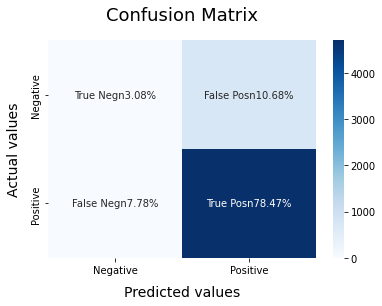

In [33]:
 # Wyświetlenie metryk ewaluacji na podstawie predykcji i ground truth (faktycznych etykiet)
#print(classification_report(y_test_vec, predictions))
y_pred_bool = np.argmax(predictions3, axis=1)

print(classification_report(y_test, y_pred_bool))

# Obliczamy i wyświetlamy confusion matrix
#cf_matrix = confusion_matrix(y_test, y_pred2)
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot = labels, cmap = 'Blues',fmt = '',
xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)